In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

#### Data Preprocessing

In [2]:
data = pd.read_csv('Titanic_train.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.shape

(891, 12)

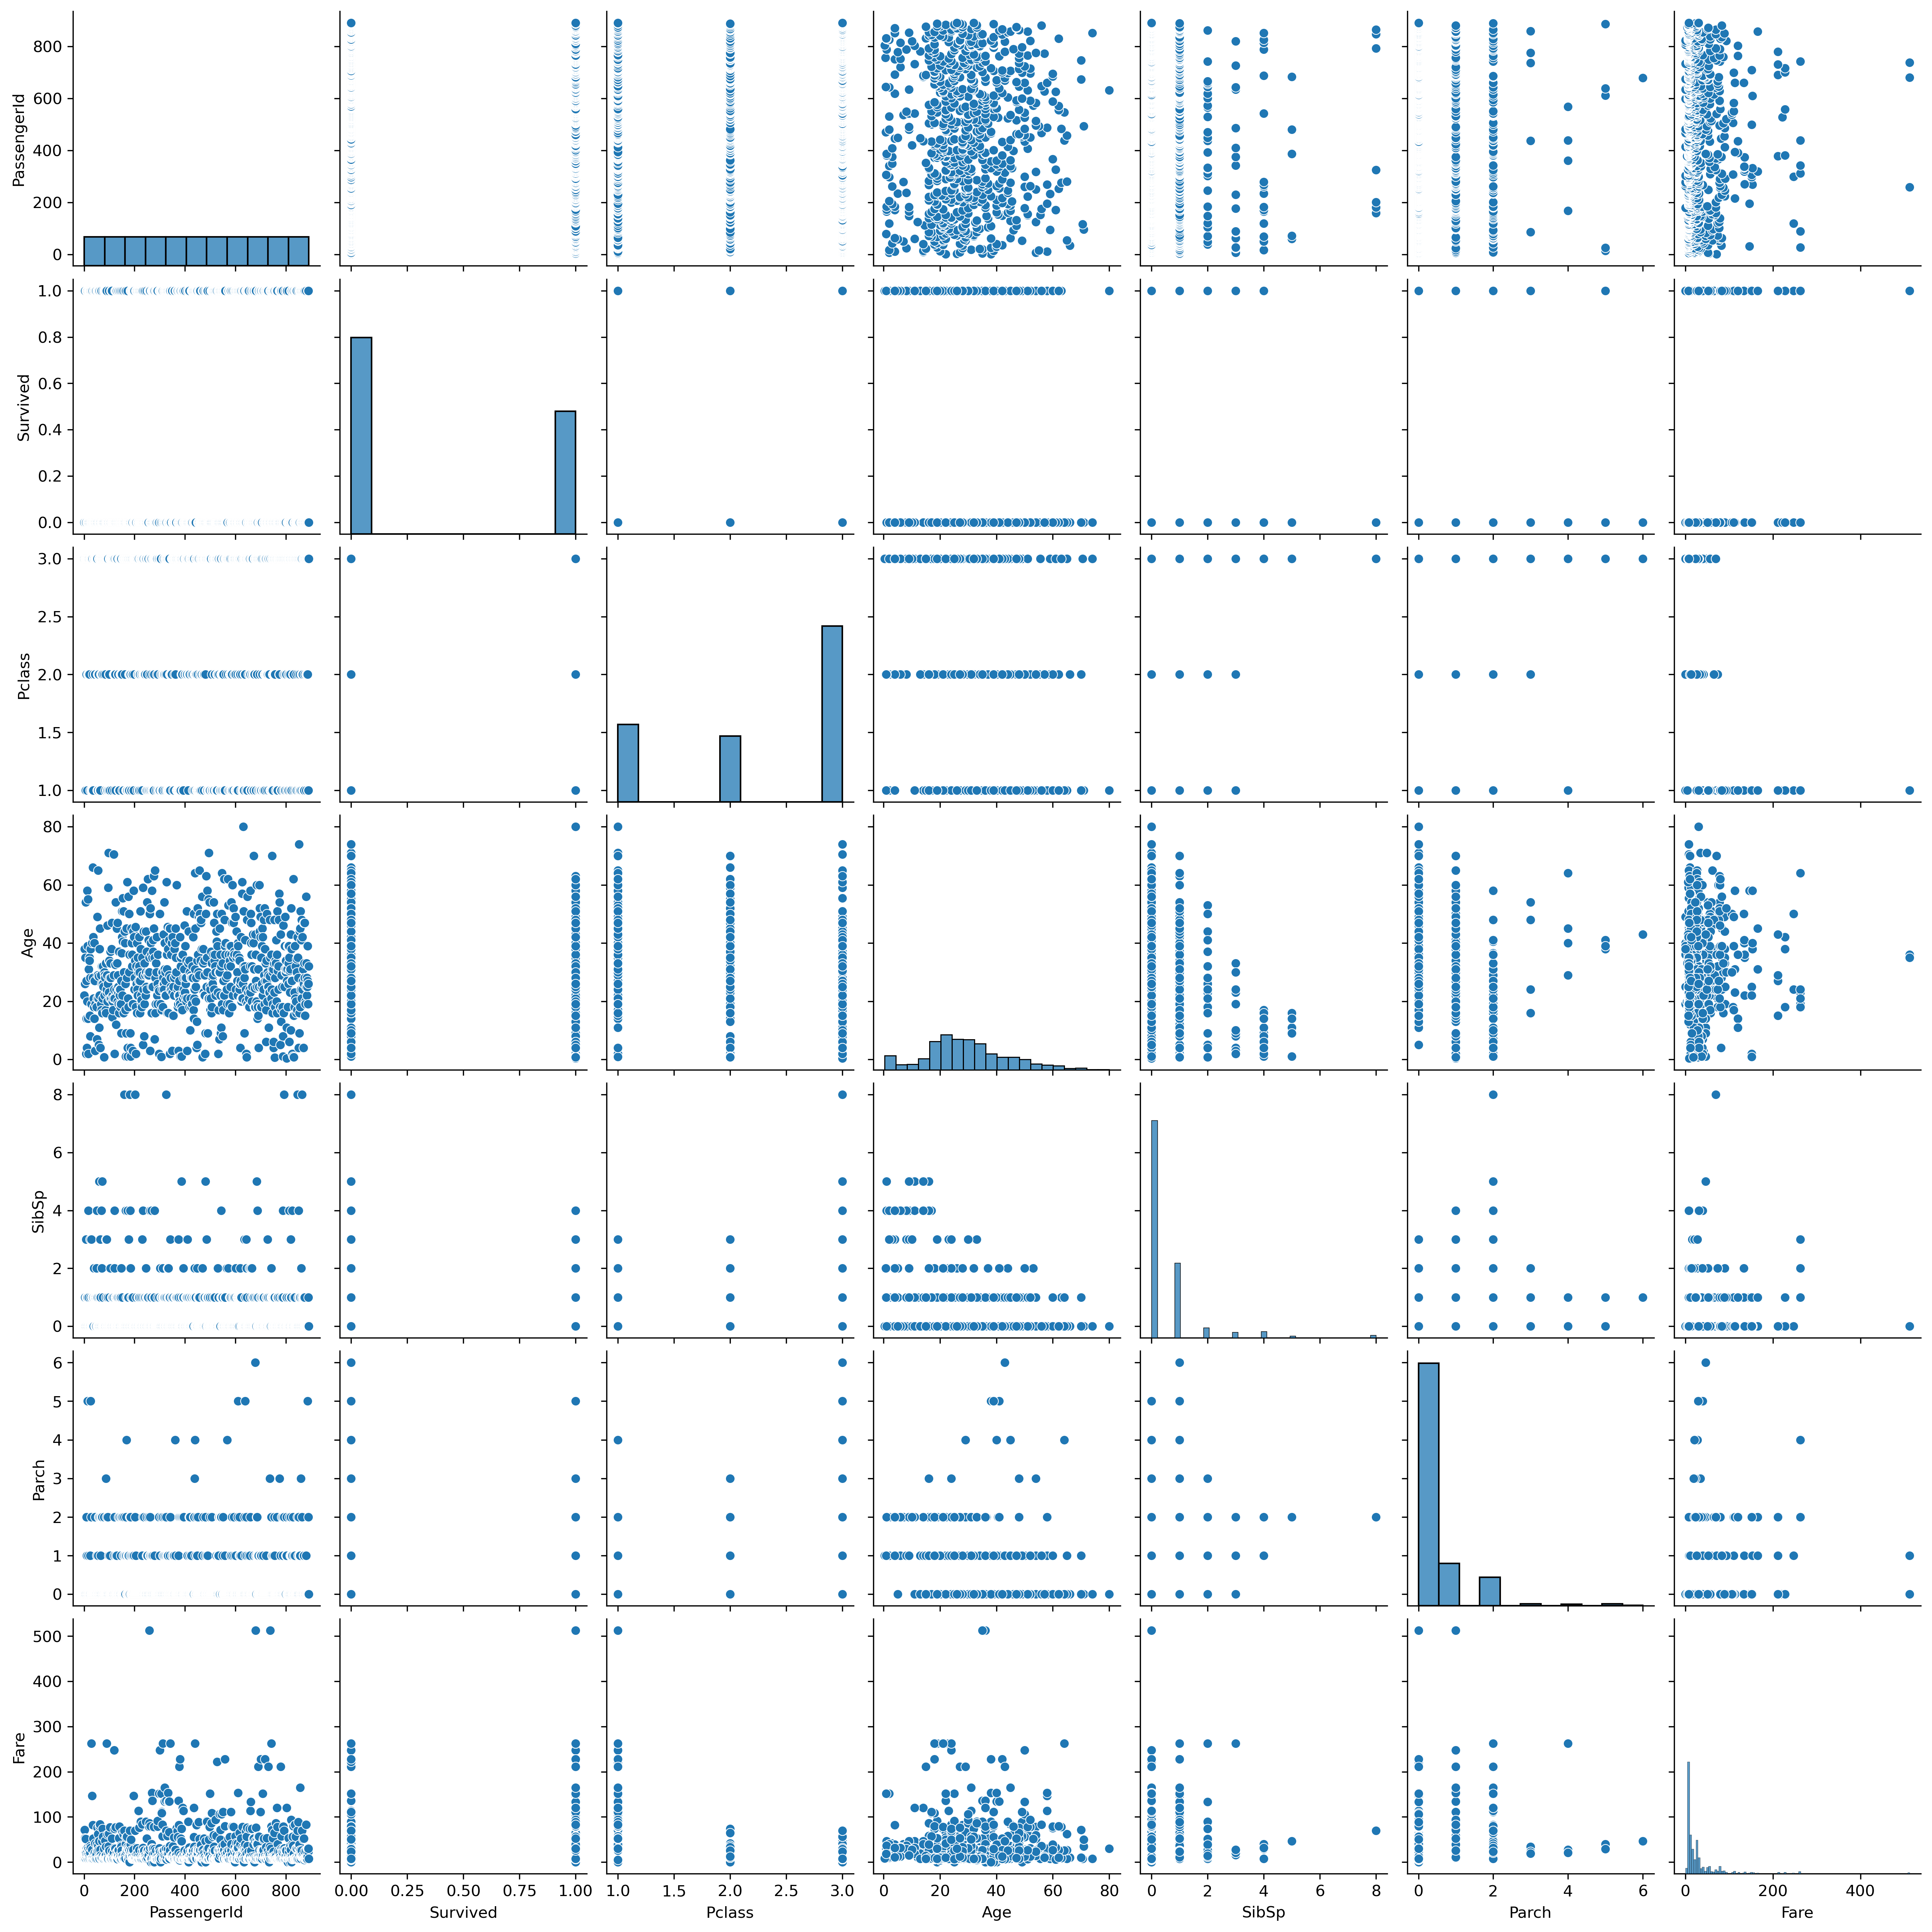

In [6]:
sns.pairplot(data)

<Axes: >

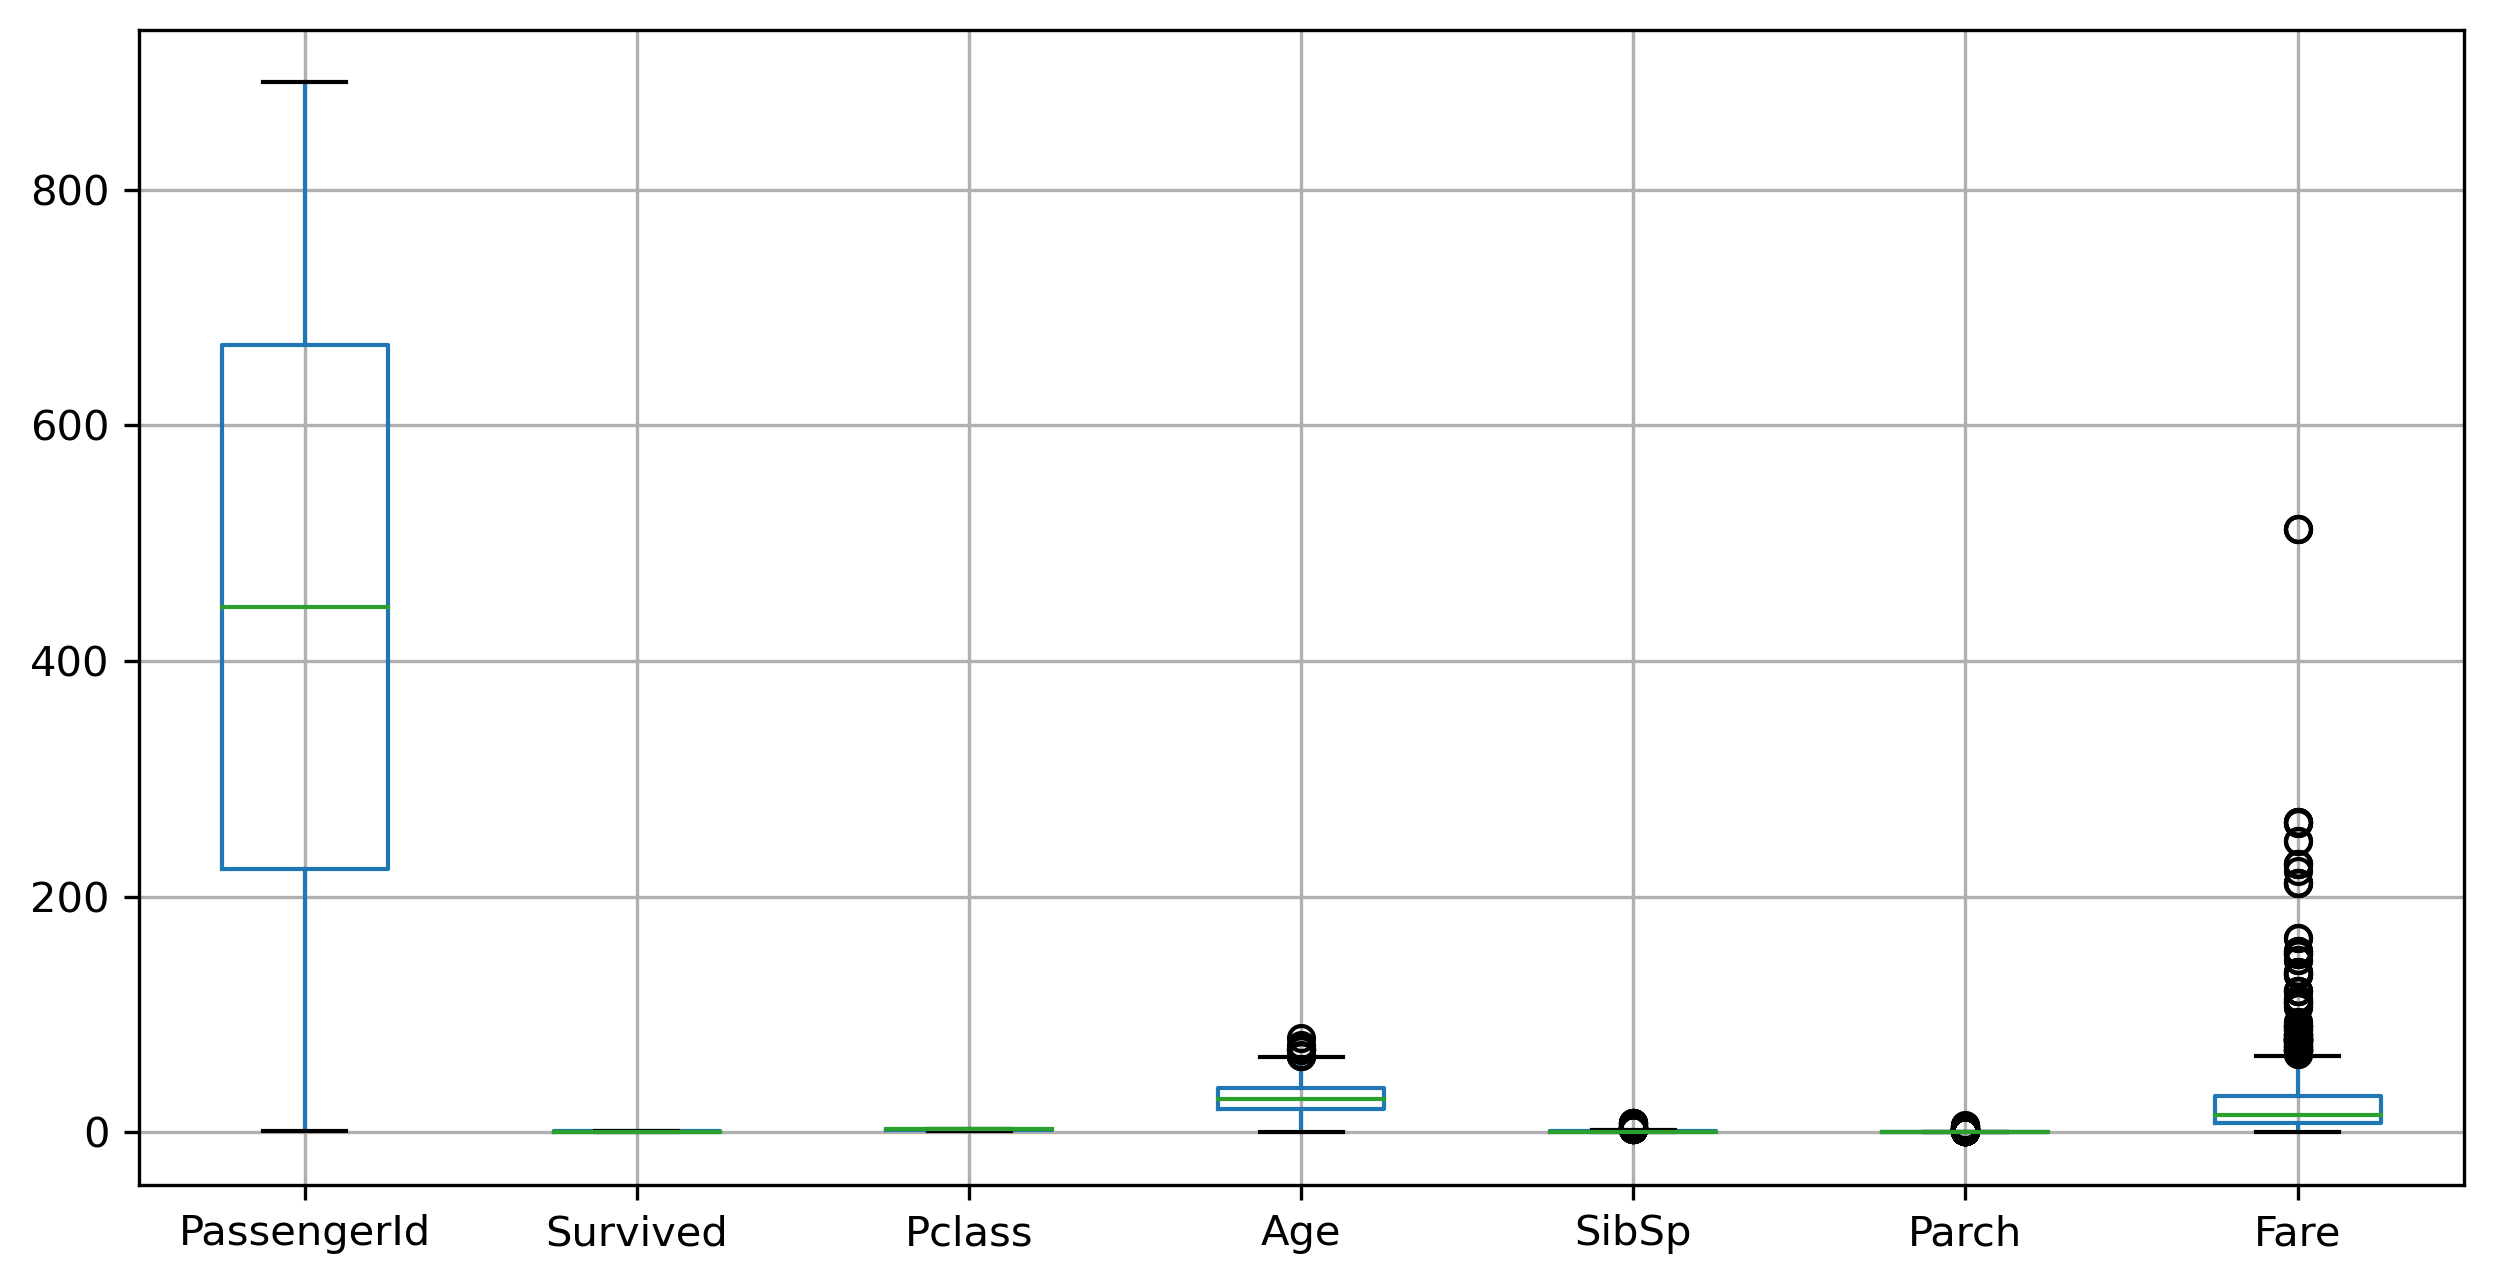

In [7]:
data.boxplot()

In [8]:
#Age column is of float and should be of datatype int
#converting it into int datatype
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [10]:
data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [11]:
data['Age'] = np.nan_to_num(data['Age'], nan=0).astype(int)

In [12]:
data['Age'].dtypes

dtype('int32')

In [13]:
#now checking for duplicates
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [14]:
data.duplicated().sum()

0

In [15]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### Handling missing values

In [16]:
data.isna()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [17]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#in columns Cabin and Embarked there are missing values 
#we will treate those values 

<Axes: >

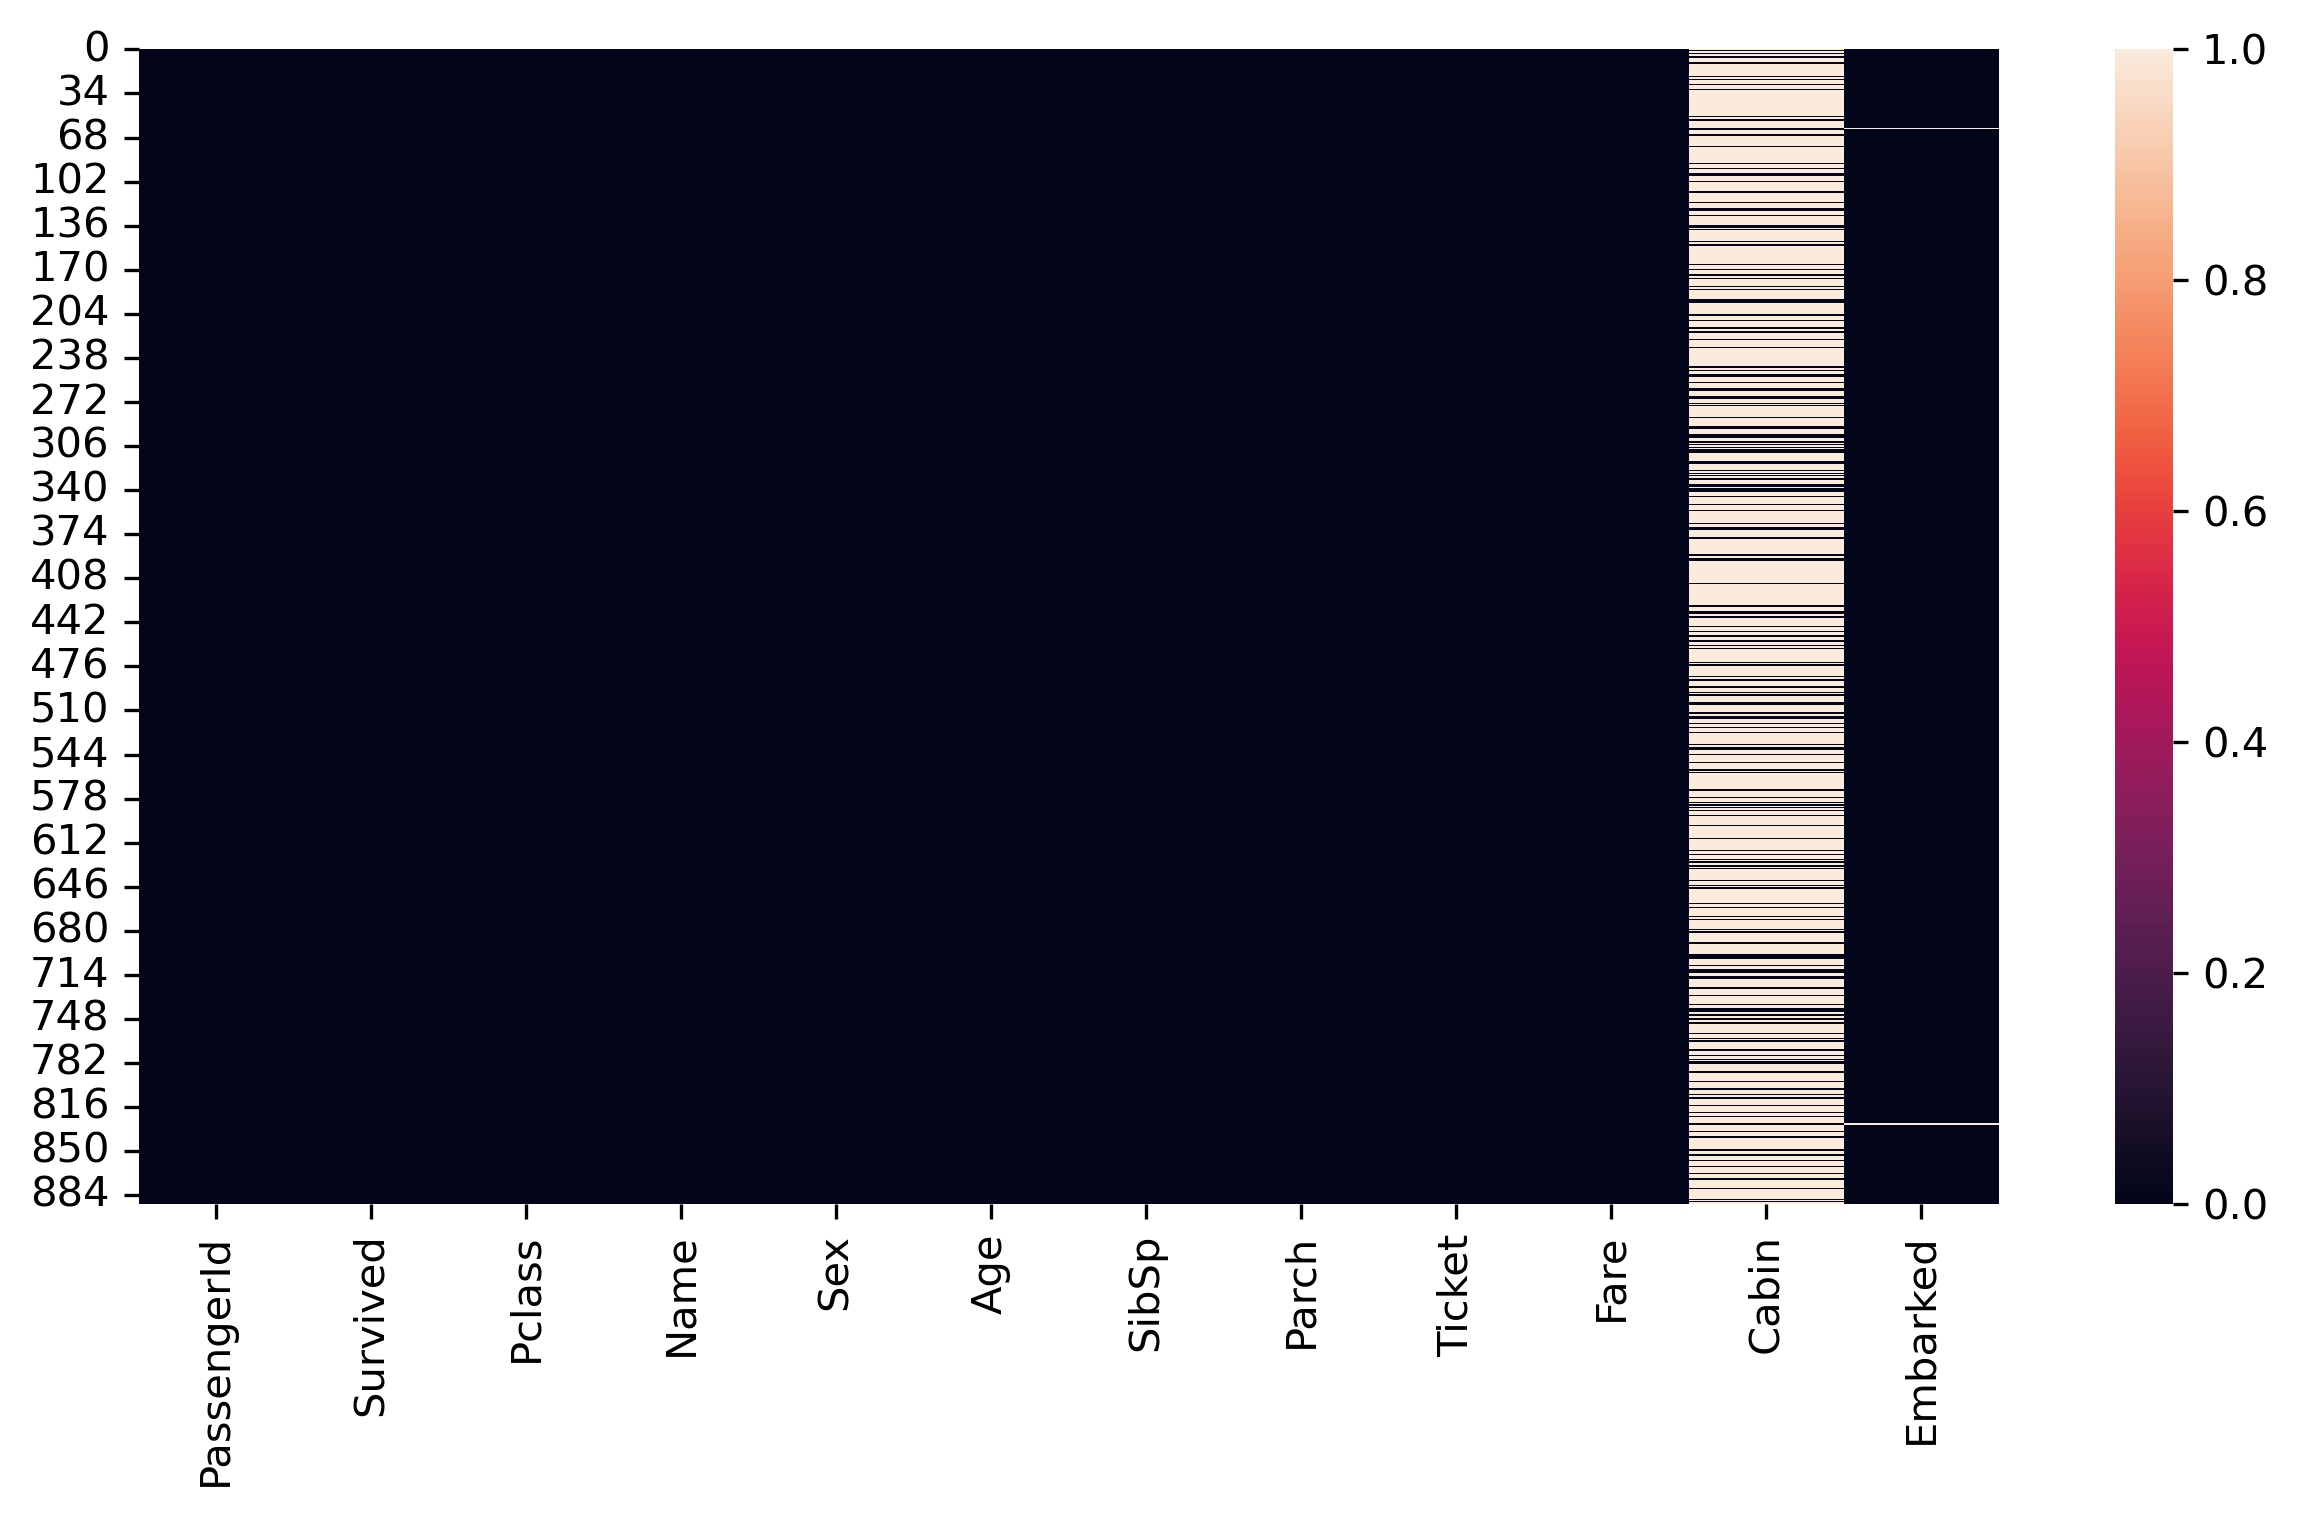

In [19]:
sns.heatmap(data.isna())

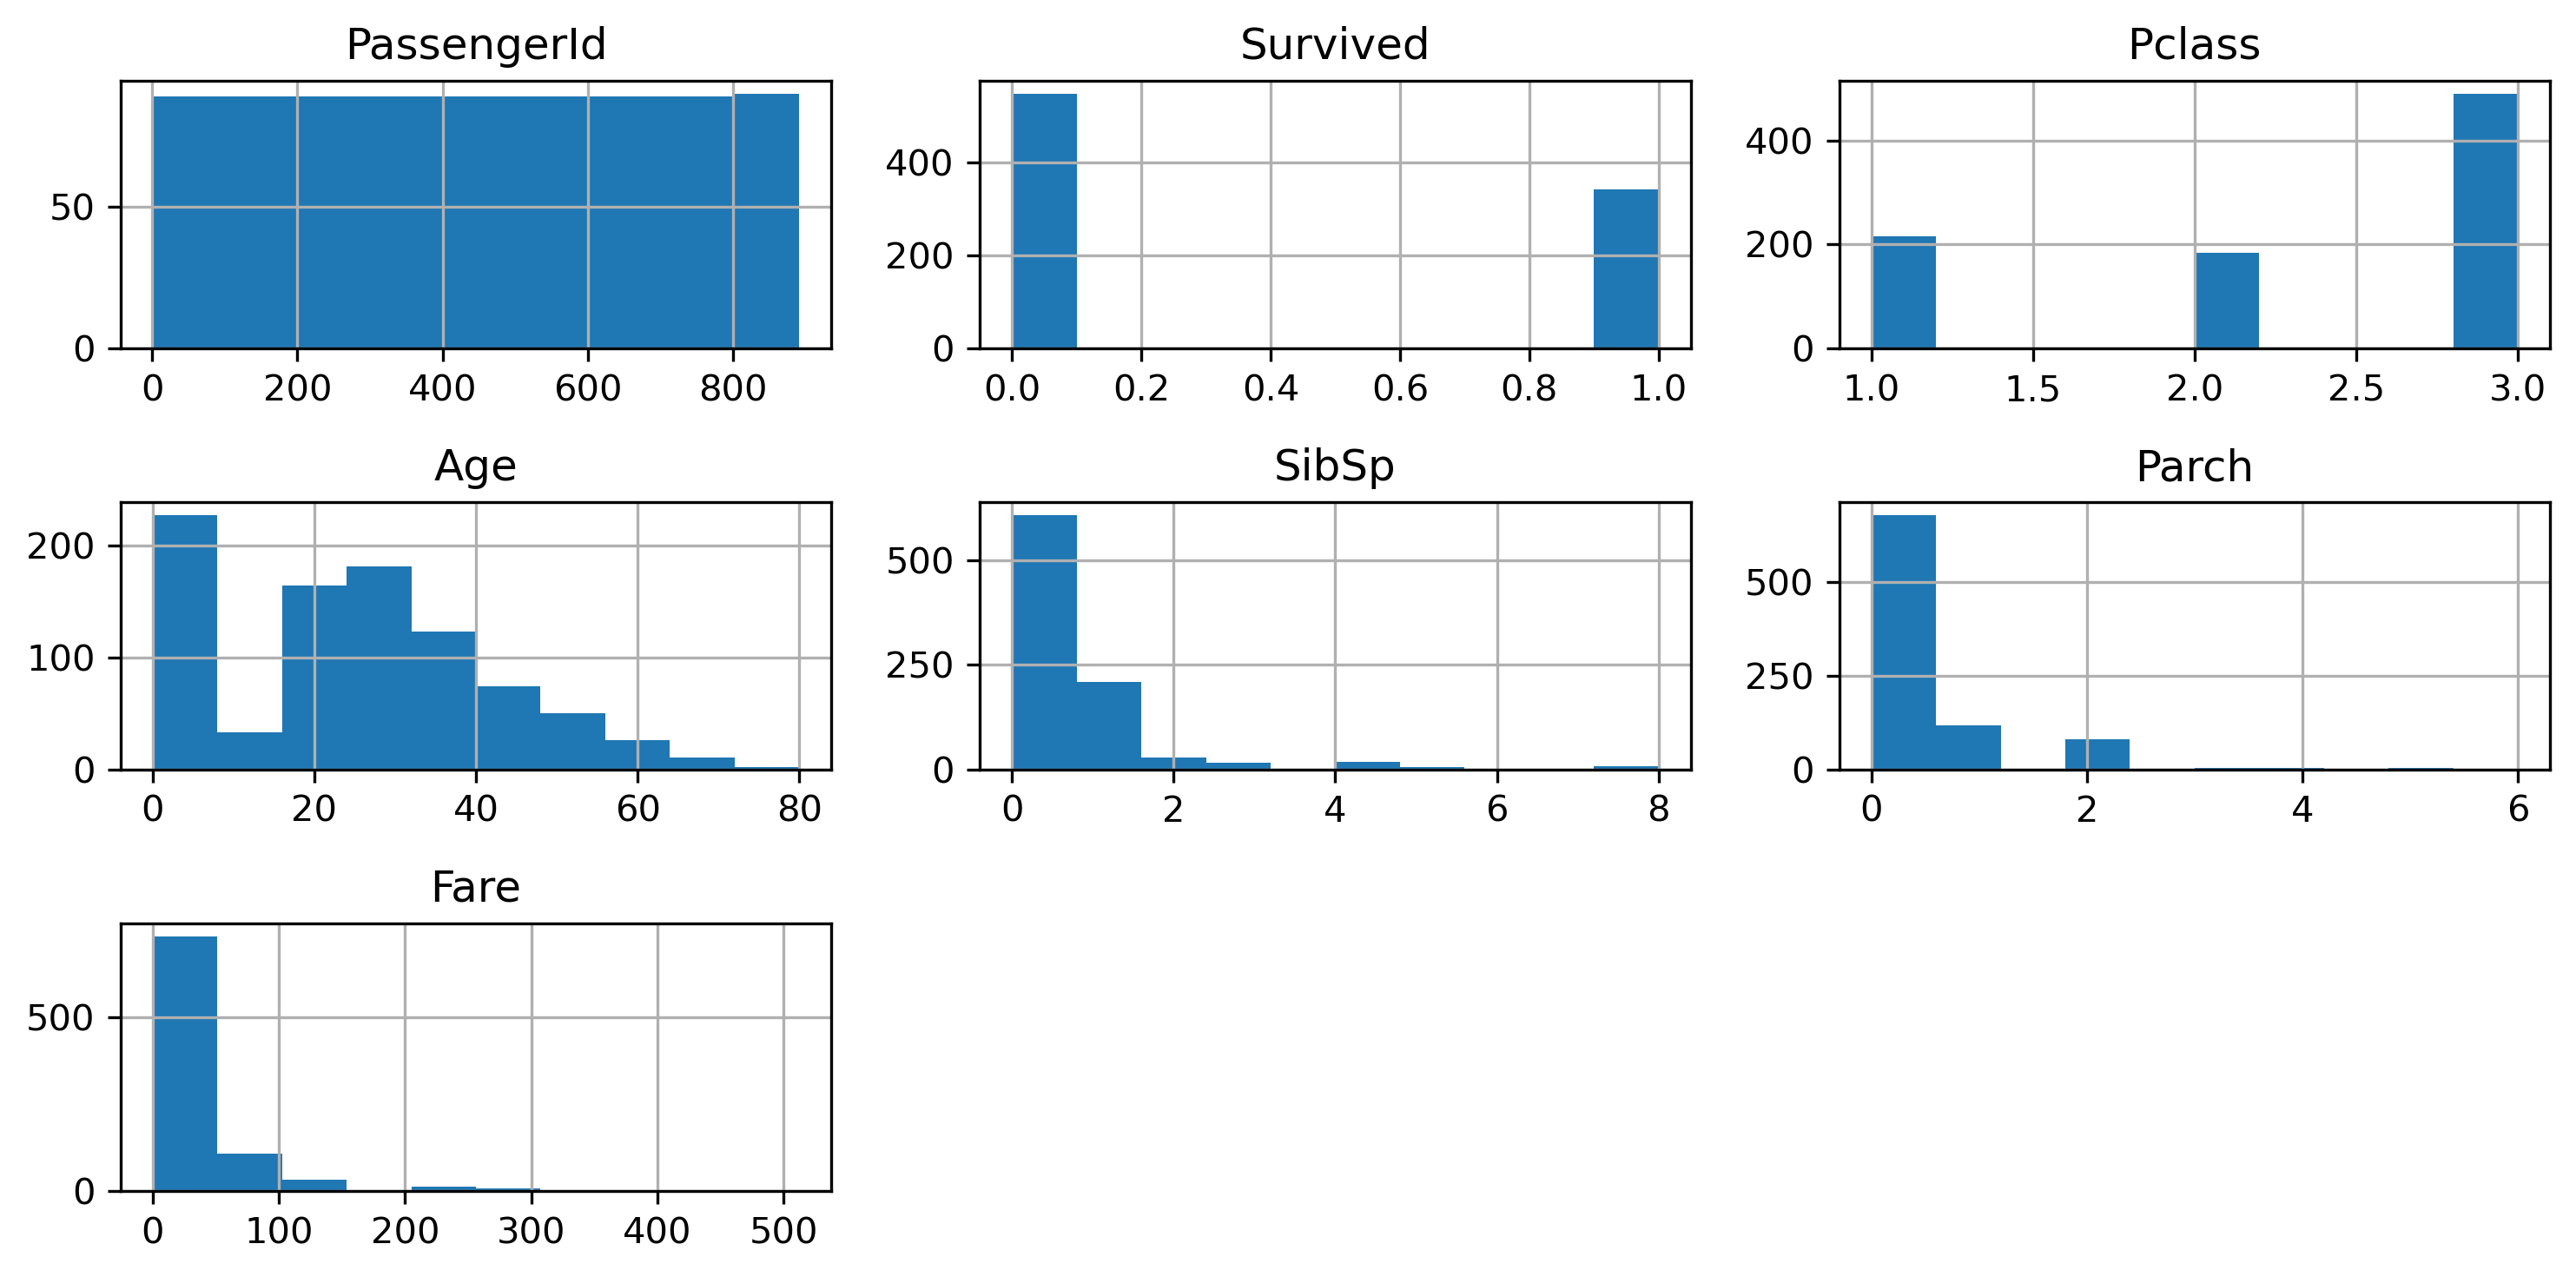

In [20]:
data.hist()
plt.tight_layout()

In [21]:
#we will calculate the percentage of missing values 
for i in data.isna().sum():
    print((i/len(data))*100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
77.10437710437711
0.22446689113355783


In [22]:
#we have a set of rules which tells us that 
# 0 to 5 % missing values: drop rows
# 6 to 45 %: replace the missing values
# 50%: drop column

# as column Cabin having percentage of missing values greater than 50% we will drop this column

In [23]:
data.drop(columns=['Cabin'],inplace=True)

In [24]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    male   22      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                               Heikkinen, Miss. Laina  female   26      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                             Allen, Mr. William Henry    male   35      0   
..                                                 ...     ...  ...    ...   
886                              Montvila, Rev. Juozas    male   27      0   
887                       Graham, Miss. Margaret Edith  female   19      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female    0      1   
889                              Behr, Mr. Karl Howell    male   26      0   
890                                Dooley, Mr. Patrick    male   32      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

In [25]:
#now for column Embarked 
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [27]:
data['Embarked'].mode()[0]

'S'

In [28]:
# we will fill those null values with the mode 
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [29]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Outlier Detection and Treatment

<Axes: >

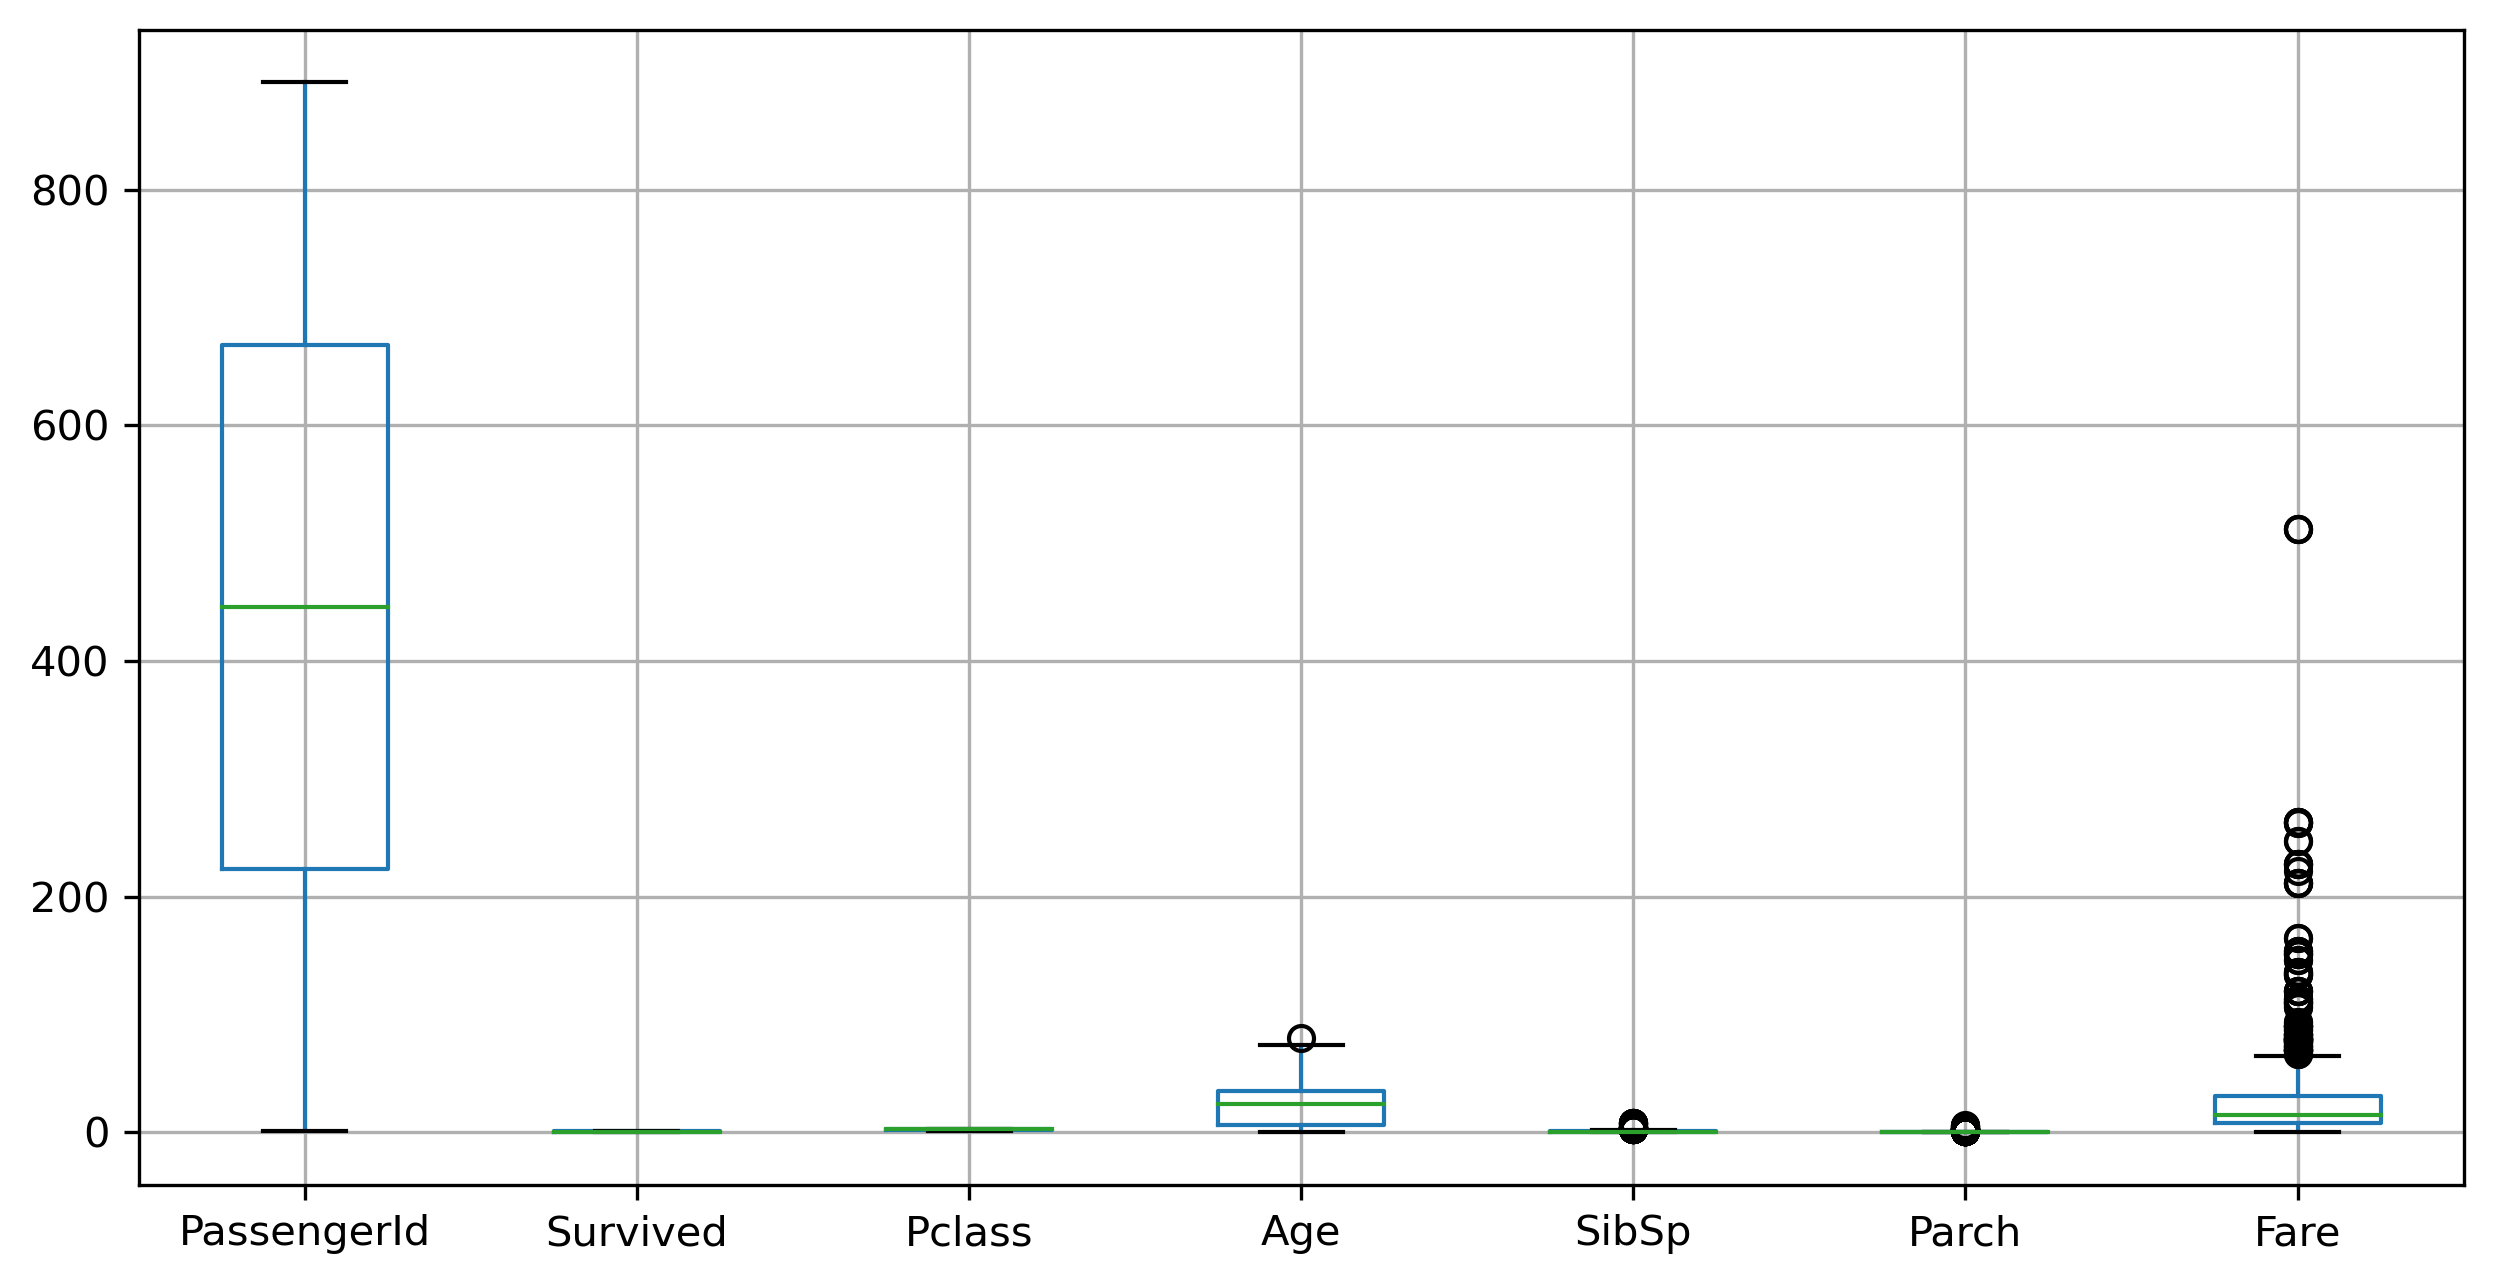

In [30]:
data.boxplot()

In [31]:
# from boxplot we can see that there are the ouliers present in columns Age, SibSp, Parch, Fare
# we will define a function to calculate upper_extreme and lower_extreme
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr= q3 - q1
    
    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    
    return lower_extreme,upper_extreme

In [32]:
# now we will define a function to treat ouliers
def outlier_treatment(data,colname):
    lower_extreme, upper_extreme = outlier_detection(data,colname)
    data.loc[data[colname]>upper_extreme,colname] = upper_extreme
    data.loc[data[colname]<lower_extreme,colname] = lower_extreme
    
    print(f"All the outliers are treated for {colname} column !!!")

In [33]:
# calling outlier_treatment function to treat outliers
outlier_treatment(data,'Age')

All the outliers are treated for Age column !!!


In [34]:
outlier_treatment(data,'SibSp')

All the outliers are treated for SibSp column !!!


In [35]:
outlier_treatment(data,'Parch')

All the outliers are treated for Parch column !!!


In [36]:
outlier_treatment(data,'Fare')

All the outliers are treated for Fare column !!!


In [37]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.0   
mean    446.000000    0.383838    2.308642   23.781706    0.426487    0.0   
std     257.353842    0.486592    0.836071   17.592031    0.708246    0.0   
min       1.000000    0.000000    1.000000    0.000000    0.000000    0.0   
25%     223.500000    0.000000    2.000000    6.000000    0.000000    0.0   
50%     446.000000    0.000000    3.000000   24.000000    0.000000    0.0   
75%     668.500000    1.000000    3.000000   35.000000    1.000000    0.0   
max     891.000000    1.000000    3.000000   78.500000    2.500000    0.0   

             Fare  
count  891.000000  
mean    24.046813  
std     20.481625  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max     65.634400

<Axes: >

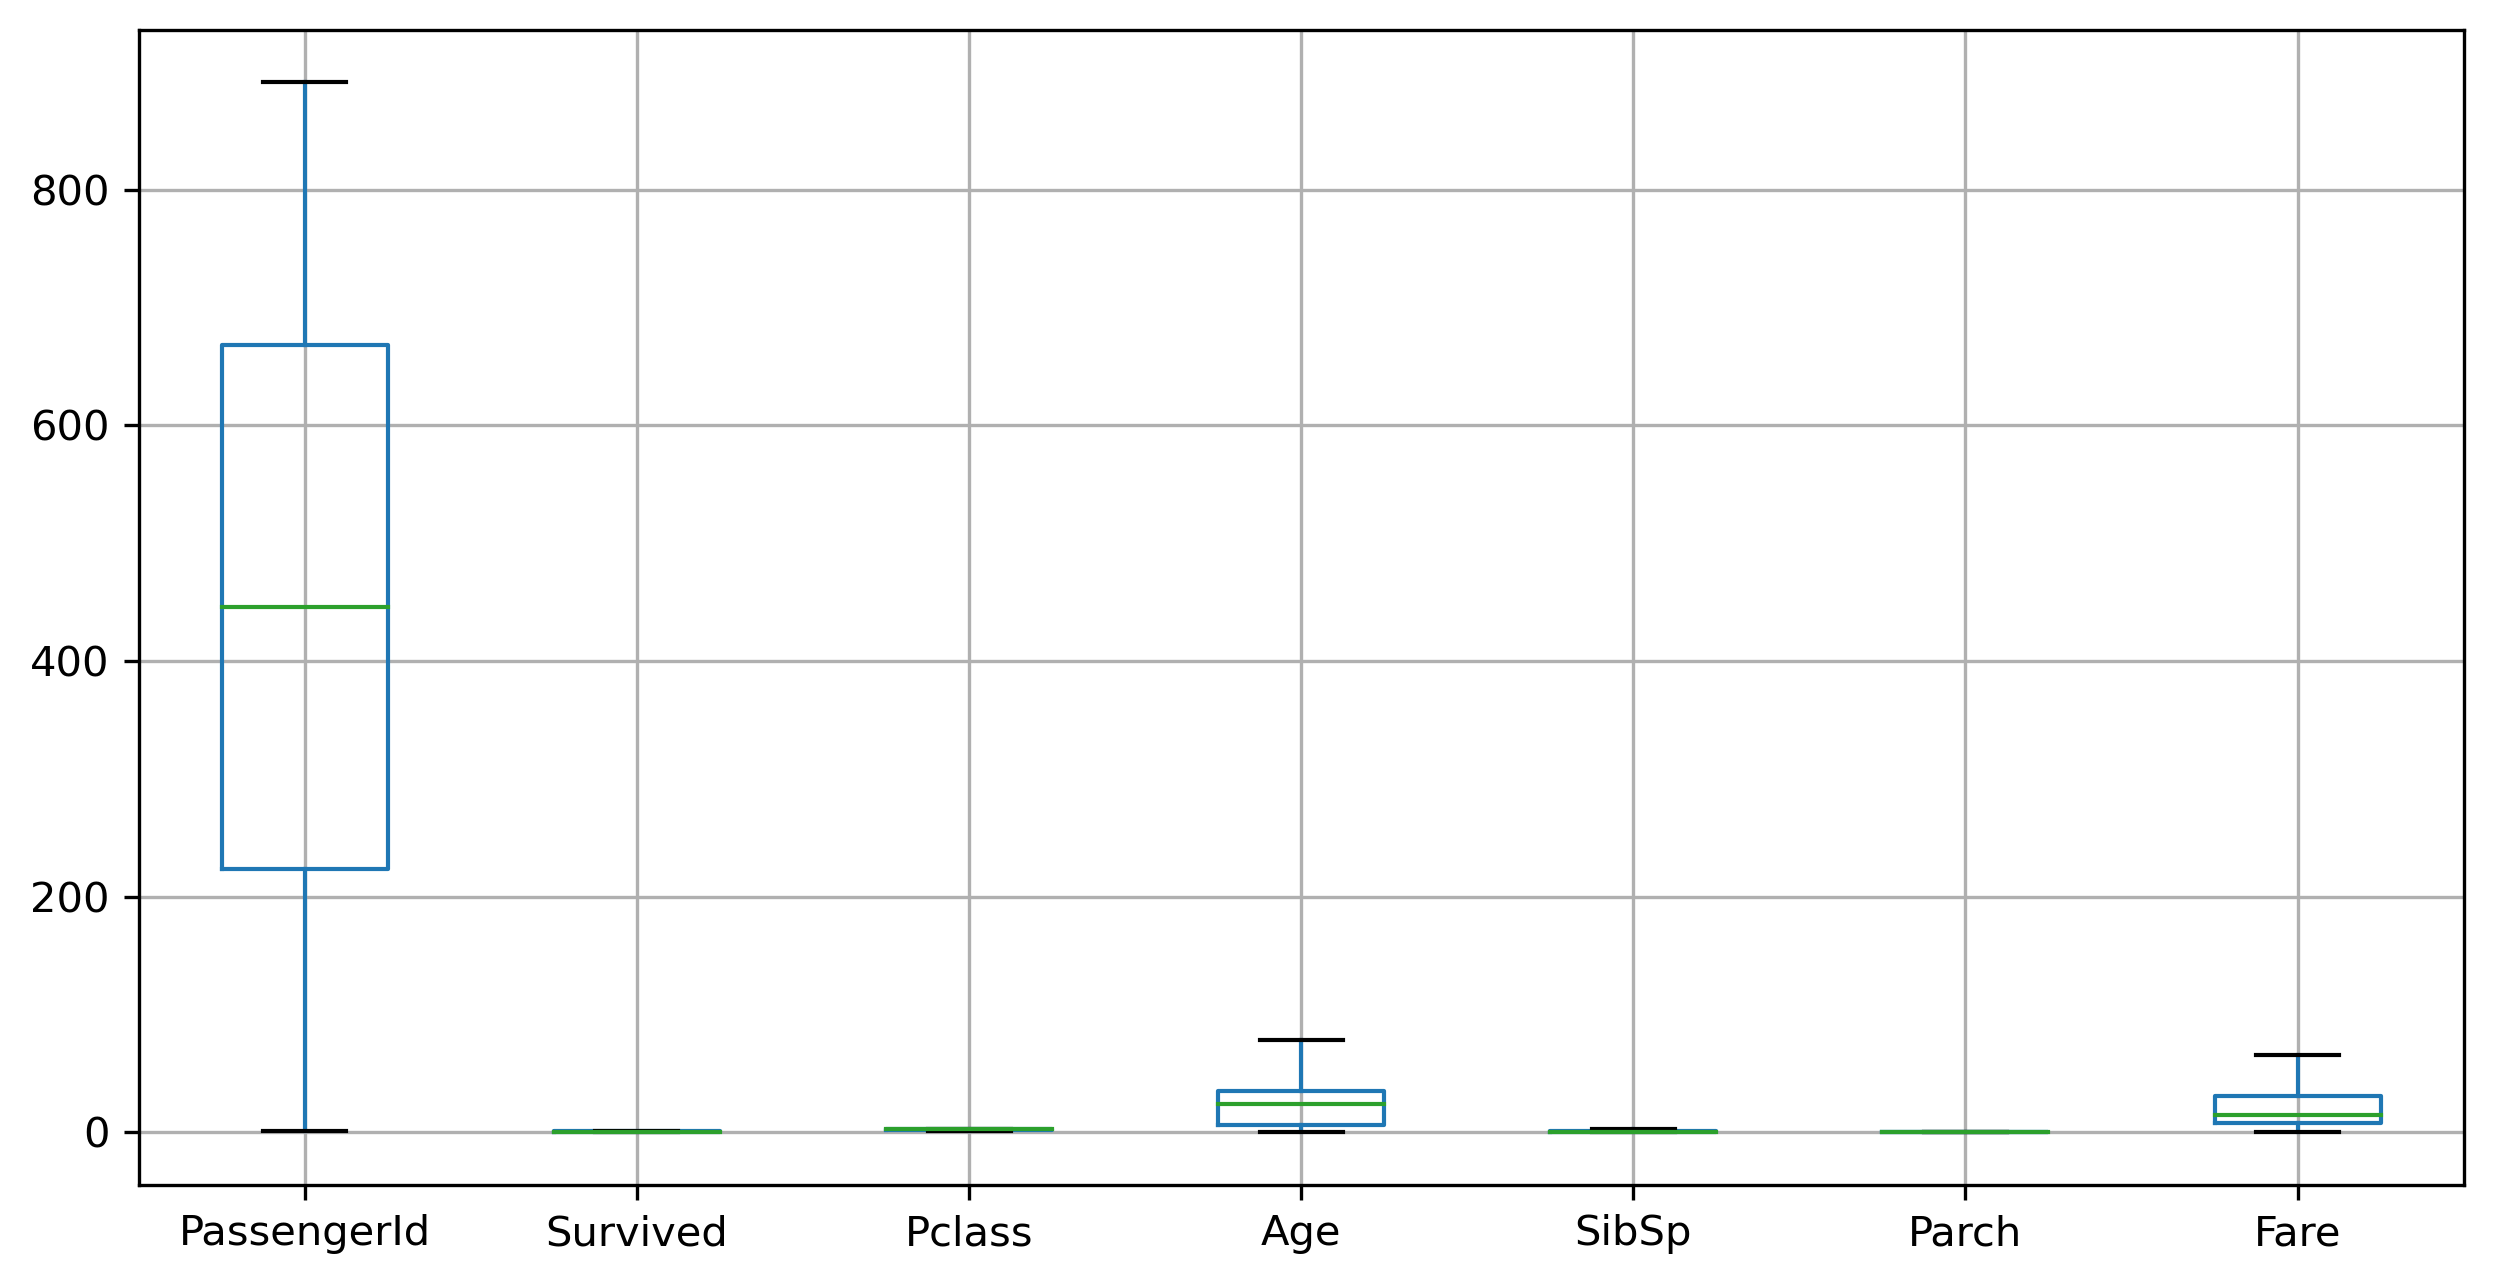

In [38]:
data.boxplot()

In [39]:
data['Age'] = np.nan_to_num(data['Age'], nan=0).astype(int)

#### Model Building

In [40]:
# there are three columns which are categorical Sex, Ticket, and Embarked 
# we will encode them using labelEncoder
from sklearn.preprocessing import LabelEncoder

In [41]:
lb = LabelEncoder()
data['Sex'] = lb.fit_transform(data['Sex'])

In [42]:
data['Ticket'] = lb.fit_transform(data['Ticket'])

In [43]:
data['Embarked'] = lb.fit_transform(data['Embarked'])

In [44]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    1   22    1.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0   38    1.0   
2                               Heikkinen, Miss. Laina    0   26    0.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   35    1.0   
4                             Allen, Mr. William Henry    1   35    0.0   
..                                                 ...  ...  ...    ...   
886                              Montvila, Rev. Juozas    1   27    0.0   
887                       Graham, Miss. Margaret Edith    0   19    0.0   
888           Johnston, Miss. Catherine Helen "Carrie"    0    0    1.0   
889                              Behr, Mr. Karl Howell    1   26    0.0   
890                                Dooley, Mr. Patrick    1   32    0.0   

     Parch  Ticket     Fare  Embarked  
0        0     523   7.2500         2  
1        0     596  65.6344         0  
2        0     669   7.9250         2  
3        0      49  53.1000         2  
4        0     472   8.0500         2  
..     ...     ...      ...       ...  
886      0     101  13.0000         2  
887      0      14  30.0000         2  
888      0     675  23.4500         2  
889      0       8  30.0000         0  
890      0     466   7.7500         1  

[891 rows x 11 columns]

In [45]:
data['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [46]:
# for column Name The titles (like "Mr.", "Mrs.", "Miss.", etc.) 
# provide important information about the passengers, such as gender and social status
data['Title'] = data['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
print(data['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64


In [47]:
# encoding Name column
data['Title'] = lb.fit_transform(data['Title'])

In [48]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    1   22    1.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0   38    1.0   
2                               Heikkinen, Miss. Laina    0   26    0.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   35    1.0   
4                             Allen, Mr. William Henry    1   35    0.0   
..                                                 ...  ...  ...    ...   
886                              Montvila, Rev. Juozas    1   27    0.0   
887                       Graham, Miss. Margaret Edith    0   19    0.0   
888           Johnston, Miss. Catherine Helen "Carrie"    0    0    1.0   
889                              Behr, Mr. Karl Howell    1   26    0.0   
890                                Dooley, Mr. Patrick    1   32    0.0   

     Parch  Ticket     Fare  Embarked  Title  
0        0     523   7.2500         2     12  
1        0     596  65.6344         0     13  
2        0     669   7.9250         2      9  
3        0      49  53.1000         2     13  
4        0     472   8.0500         2     12  
..     ...     ...      ...       ...    ...  
886      0     101  13.0000         2     15  
887      0      14  30.0000         2      9  
888      0     675  23.4500         2      9  
889      0       8  30.0000         0     12  
890      0     466   7.7500         1     12  

[891 rows x 12 columns]

In [49]:
# dropping column Name
data.drop('Name', axis=1, inplace=True)

In [50]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age              int32
SibSp          float64
Parch            int64
Ticket           int32
Fare           float64
Embarked         int32
Title            int32
dtype: object

In [51]:
data

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Ticket     Fare  \
0              1         0       3    1   22    1.0      0     523   7.2500   
1              2         1       1    0   38    1.0      0     596  65.6344   
2              3         1       3    0   26    0.0      0     669   7.9250   
3              4         1       1    0   35    1.0      0      49  53.1000   
4              5         0       3    1   35    0.0      0     472   8.0500   
..           ...       ...     ...  ...  ...    ...    ...     ...      ...   
886          887         0       2    1   27    0.0      0     101  13.0000   
887          888         1       1    0   19    0.0      0      14  30.0000   
888          889         0       3    0    0    1.0      0     675  23.4500   
889          890         1       1    1   26    0.0      0       8  30.0000   
890          891         0       3    1   32    0.0      0     466   7.7500   

     Embarked  Title  
0           2     12  
1           0     13  
2           2      9  
3           2     13  
4           2     12  
..        ...    ...  
886         2     15  
887         2      9  
888         2      9  
889         0     12  
890         1     12  

[891 rows x 11 columns]

In [52]:
# dividing data into train and test 
x = data.drop('Survived',axis = 1)
y = data['Survived']

In [53]:
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [54]:
y_pred = classifier.predict(x)

In [55]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [56]:
y_pred_df = pd.DataFrame({'Y': y,
                         'YHat' : classifier.predict(x)})

In [57]:
y_pred_df

Y  YHat
0    0     0
1    1     1
2    1     0
3    1     1
4    0     0
..  ..   ...
886  0     0
887  1     1
888  0     1
889  1     0
890  0     0

[891 rows x 2 columns]

#### Model Evaluation

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[473  76]
 [115 227]]


In [59]:
print(f"Accuracy : {((467+236)/(467+82+106+236))*100}")

Accuracy : 78.90011223344557


In [60]:
# ROC Curve

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

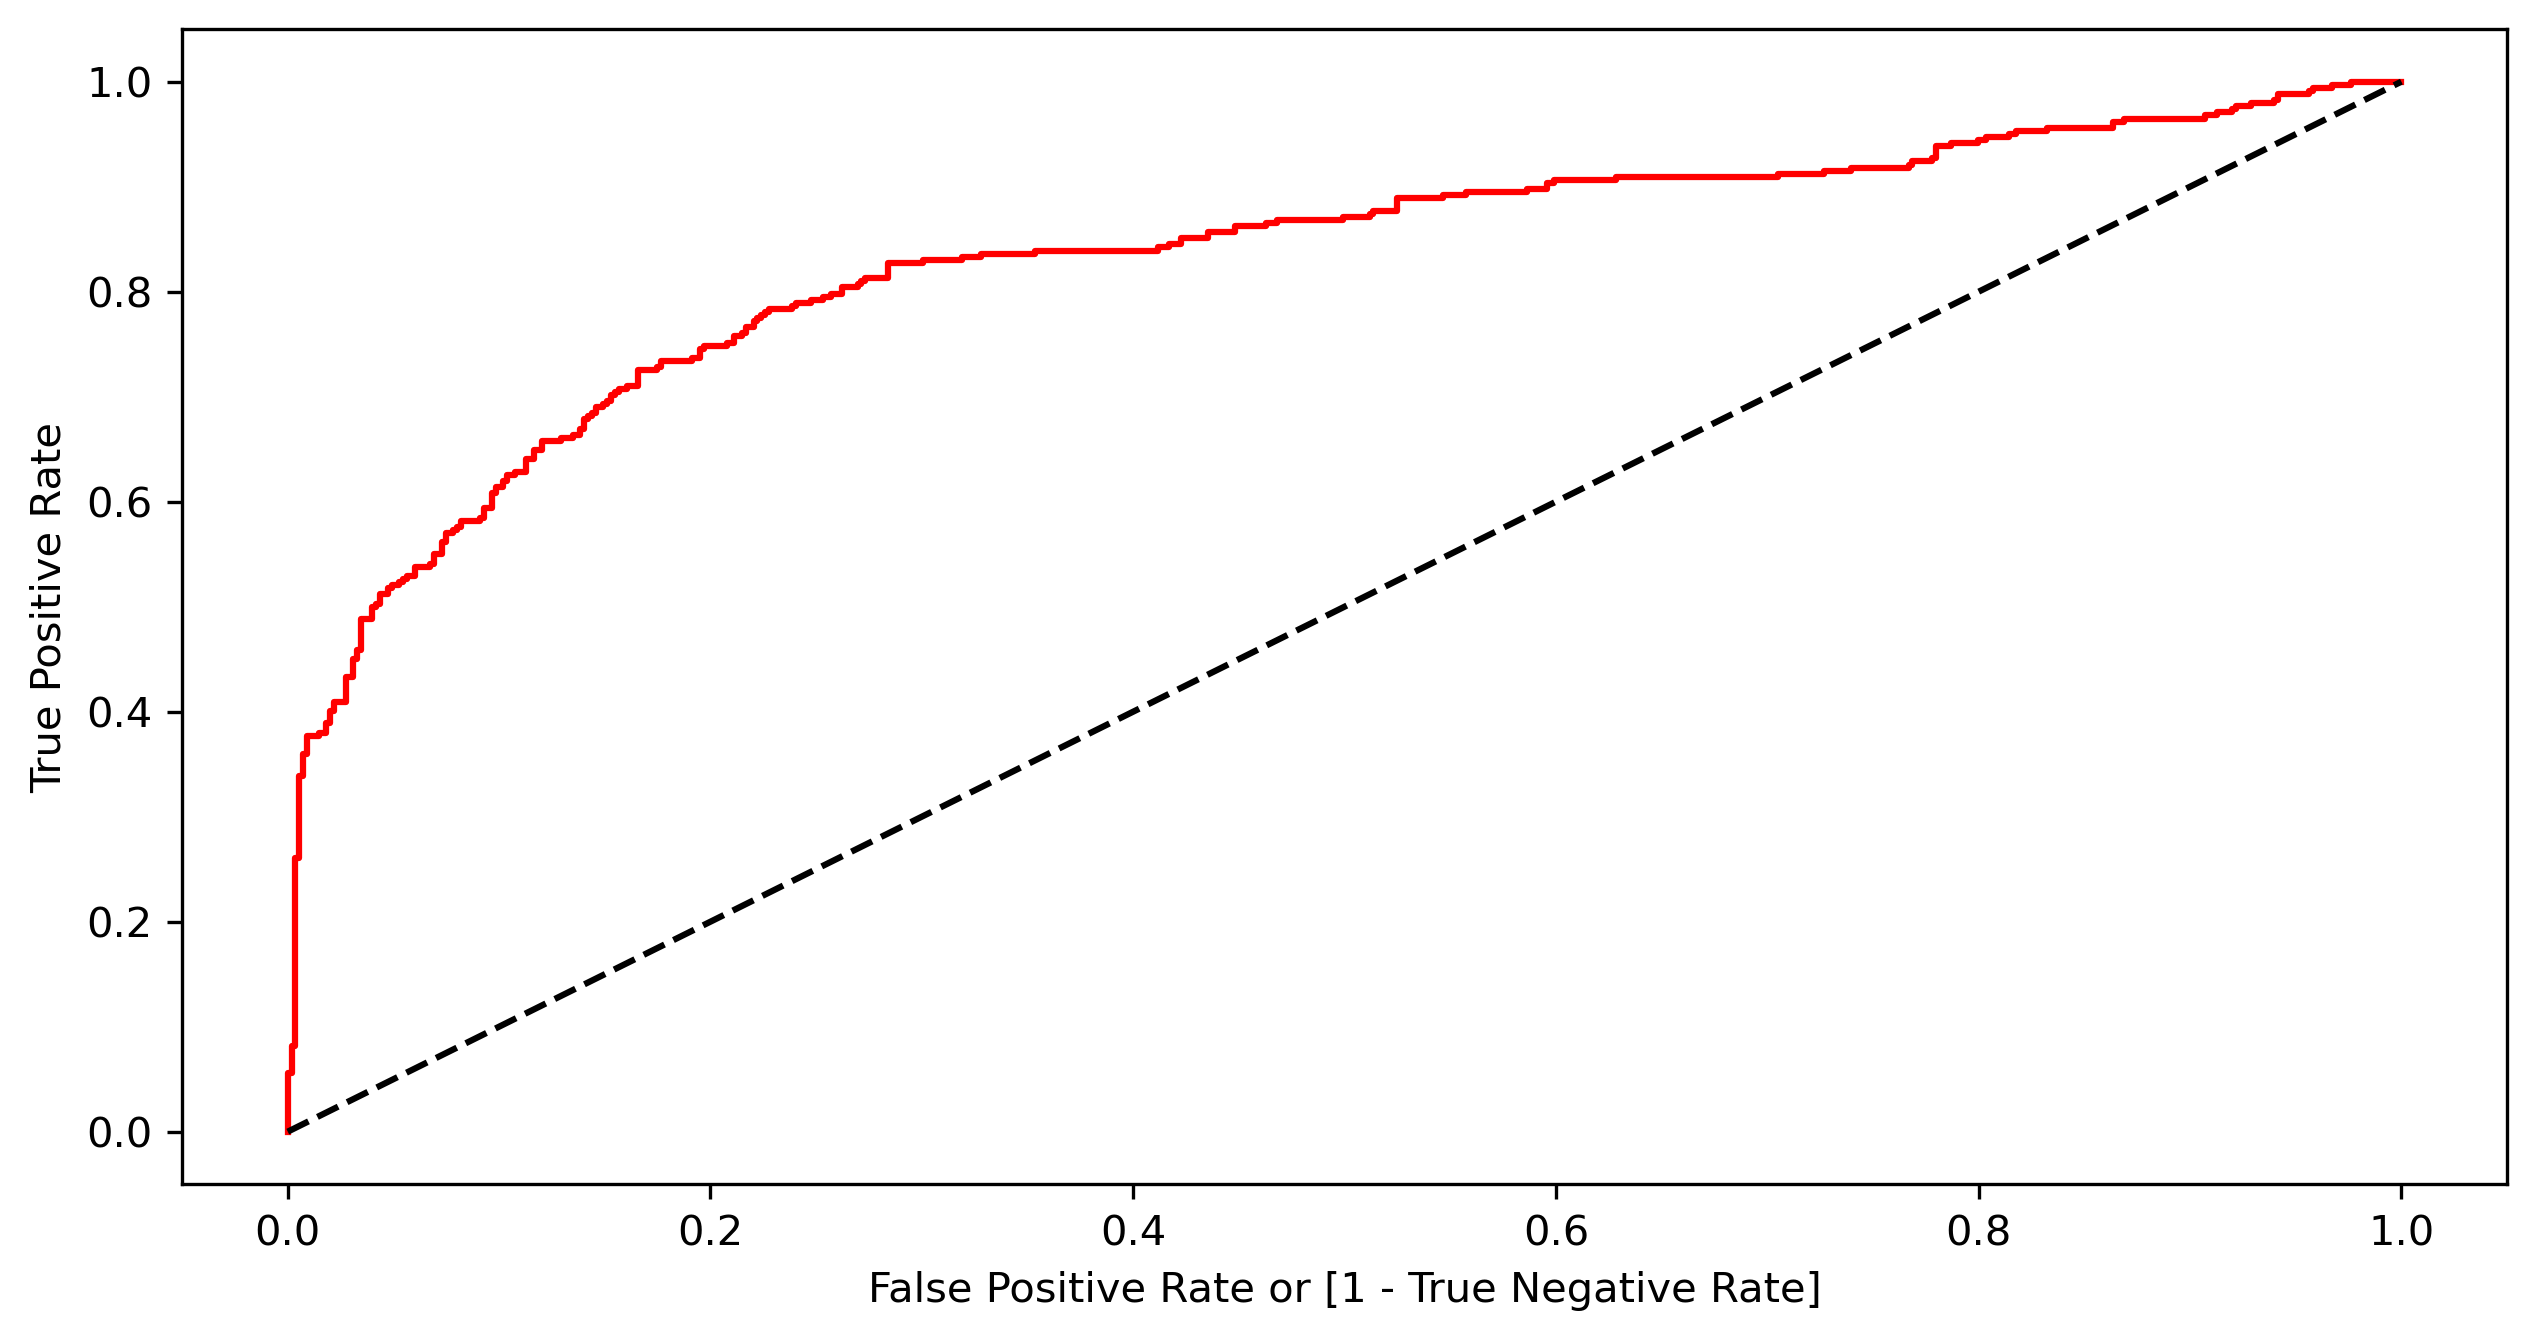

In [65]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show() # red one is roc curve

In [67]:
auc

0.7626545872878918

In [69]:
classifier.coef_

array([[ 4.55306263e-04, -3.70213181e-01, -2.46899833e+00,
        -1.16517785e-02, -5.40786603e-01,  0.00000000e+00,
        -6.64992331e-04,  2.74604331e-02,  3.52658773e-02,
         7.08378325e-02]])

In [ ]:
'''The significance of features in predicting survival probability highlights how various factors, 
such as age, sex, class, and fare, influence an individual's likelihood of survival, allowing for targeted interventions or 
risk assessments. Understanding these relationships can enhance model accuracy and provide actionable insights in decision-making processes.'''

#### Interview Questions

In [ ]:
'''
1. What is the difference between precision and recall?
-> Precision is the ratio of correctly predicted positive observations to the total predicted positives, reflecting how 
   accurate the positive predictions are. Recall is the ratio of correctly predicted positives to the total actual positives, 
   indicating the model’s ability to capture all relevant instances.
   
2. What is cross-validation, and why is it important in binary classification?
-> Cross-validation is a technique for assessing how a model generalizes to new data by splitting the dataset into several 
   parts for training and testing iteratively. It’s crucial in binary classification as it helps prevent overfitting, ensuring 
   the model performs well on unseen data.
'''